# FIT3081 Image Processing - Assingment 3 (S1, 2023)

<div style="text-align: left"> <h3> Student 1: Kuah Jia Chen, 32286988  </h3>  </div>
<div style="text-align: left"> <h3> Student 2: Samuel Tai Meng Yao, 32025068  </h3>  </div>

<hr style="height:3px;border-width:0;color:gray;background-color:gray">

## Outline

1. Overview (This notebook)
3. Import Libraries
4. Helper Functions
5. Section 1: Dataset Pre-processing 

## Overview
This notebook contains code blocks for dataset pre-processing, aimed at converting cropped number plates (containing alphabets and numerals) into a suitable format for effective training of a Neural Network. Our aim is to preprocess and transform the image into a filled image (in our case, filled cropped alphabets/numerals).

## Import Libraries

In [1]:
# Import Libraries
import cv2
import matplotlib.pyplot as plt
import math
import os
import numpy as np
from PIL import Image

## Helper Functions

In [2]:
def read_img(image_name):
    """
    Read image and convert to gray scale
    """
    number_plate_char = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)    # Read and convert to grayscale
    
    return np.array(number_plate_char)

In [3]:
def resize_img(img_arr, w, h):
    """
    Resize the image to the desired w x h
    """
    number_plate_char = cv2.resize(img_arr, (w,h))
    
    return number_plate_char

In [4]:
def bilateral_smoothing(img_arr, d, sigmaColor, sigmaSpace):
    """
    Noise smoothing on image using bilateral filter
    """
    bilateral = cv2.bilateralFilter(img_arr, d, sigmaColor, sigmaSpace)
    
    return bilateral

In [5]:
def pre_process_filled(img_name, w,h):
    """
    Pre-process the image to transform it into a filled image.
    """
    img_arr = read_img(img_name)                              # Read the image, convert to grayscale
    img_arr = resize_img(img_arr, w, h)                       # Resize the image
    smooth_img_arr = bilateral_smoothing(img_arr, 5, 90, 80)  # Noise smoothing
    
    # Using adaptive threshold to transform the image into binary image
    adapT = cv2.adaptiveThreshold(smooth_img_arr, 255, \
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                              cv2.THRESH_BINARY, 199, 5)

    return adapT
    

## Section 1: Dataset Pre-procssing

In this section, we are going to preprocess the cropped characters (i.e., the dataset) into the desired format that we wanted to use them to train the Neural Network. Our aim is to transform each cropped character into binarized image which is a filled character.

The results of the pre-processing are shown below.

### Filled alphabets

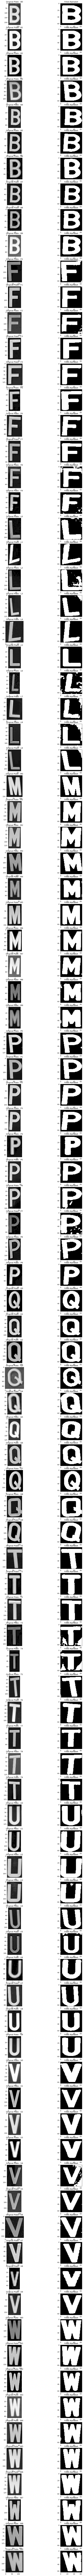

In [6]:
dir = r"C:\Users\User\Documents\Monash Y3\S1\FIT 3081\Assignment\A3\Dataset\Original plate\Combine_alphabet"

fig, axs = plt.subplots(len(os.listdir(dir)), 2, figsize=(12, 3*len(os.listdir(dir))))

numbering = 0   # Numbering of the image
alp = 0   # Label of the Image
alphabets = ['B','F','L','M','P','Q','T','U','V','W']   # Unique alphabets list

for i, pic in enumerate(os.listdir(dir)):
    pic_dir = os.path.join(dir,pic)
    ori_img = read_img(pic_dir)
    filled_num_plate = pre_process_filled(pic_dir, 64, 64)    # Pre-process into filled image
    
    axs[i, 0].imshow(cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'Original Plate - {alphabets[alp]}{numbering}')
    axs[i, 1].imshow(cv2.cvtColor(filled_num_plate, cv2.COLOR_GRAY2RGB))
    axs[i, 1].set_title('Filled Alphabet')
    
     # Save the images into the specific folder
    path = 'C:\\Users\\User\\Documents\\Monash Y3\\S1\\FIT 3081\\Assignment\\A3\\Dataset\\Filled plate\\Filled_alphabet'
    cv2.imwrite(os.path.join(path , f'A{numbering}{10+alp}.jpg'), filled_num_plate)
    
    # Image naming convention
    if numbering == 9:
        numbering = 0
        alp += 1
    else:
        numbering += 1

### Filled numerals

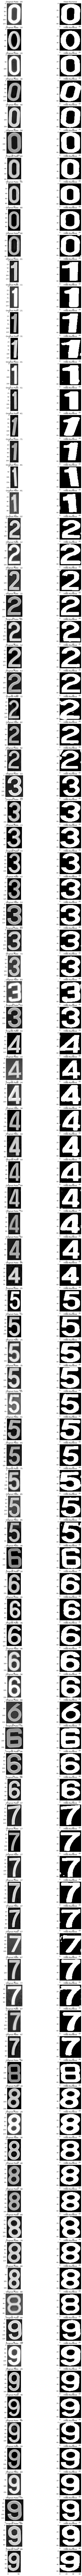

In [8]:
dir = r"C:\Users\User\Documents\Monash Y3\S1\FIT 3081\Assignment\A3\Dataset\Original plate\Combine_numeral"

fig, axs = plt.subplots(len(os.listdir(dir)), 2, figsize=(12, 3*len(os.listdir(dir))))

numbering = 0    # Numbering of the image
num = 0   # Label of the Image

for i, pic in enumerate(os.listdir(dir)):
    pic_dir = os.path.join(dir,pic)
    ori_img = read_img(pic_dir)
    filled_num_plate = pre_process_filled(pic_dir, 64, 64)    # Pre-process into filled image
    
    axs[i, 0].imshow(cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'Original Plate - {numbering}{num}')
    axs[i, 1].imshow(cv2.cvtColor(filled_num_plate, cv2.COLOR_GRAY2RGB))
    axs[i, 1].set_title('Filled Numeral')
    
    # Save the images into the specific folder
    path = 'C:\\Users\\User\\Documents\\Monash Y3\\S1\\FIT 3081\\Assignment\\A3\\Dataset\\Filled_numeral'
    cv2.imwrite(os.path.join(path , f'A{numbering}{num}.jpg'), filled_num_plate)
    
    # Image naming convention
    if numbering == 9:
        numbering = 0
        num += 1
    else:
        numbering += 1